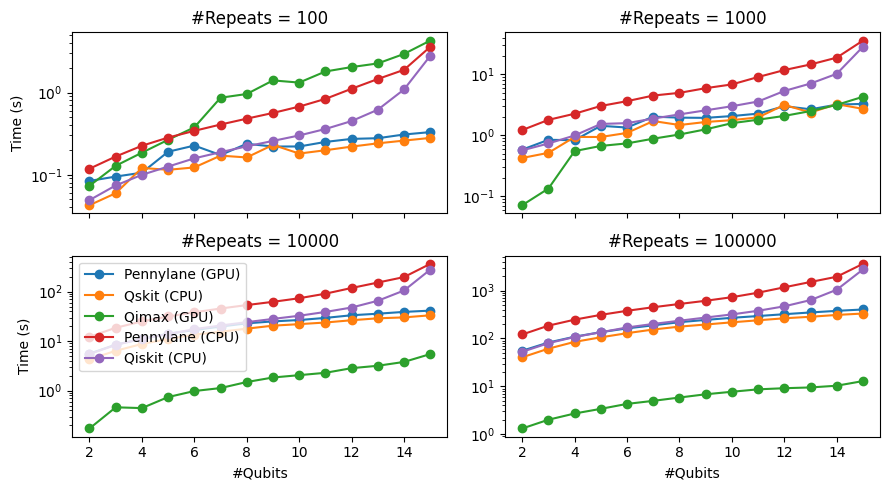

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Read the CSV files
pennylane = pd.read_csv('../data/qml_rtx4090/time_num_layers2_xyzcx_pennylane_gpu.csv')
qiskit = pd.read_csv('../data/qml_rtx4090/time_num_layers2_xyzcx_qiskit_gpu.csv')
qimax = pd.read_csv('../data/qml_rtx4090/time_num_layers2_xyzcx_qimax.csv')
pennylane_cpu = pd.read_csv('../data/qml_cpu/time_num_layers2_xyzcx_pennylane_cpu.csv')
qiskit_cpu = pd.read_csv('../data/qml_cpu/time_num_layers2_xyzcx_qiskit_cpu.csv')
# Define the unique num_repeats values for subplots
num_repeats_values = [100, 1000, 10000, 100000]

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(9, 5))
orders = [[0, 0], [0, 1], [1, 0], [1, 1]]  # Define the order of subplots
# Plot data from each file
for i, num_repeats in enumerate(num_repeats_values):
    ax = axes[orders[i][0], orders[i][1]]
    for file, label in zip([pennylane, qiskit, qimax, pennylane_cpu, qiskit_cpu], 
                           ['Pennylane (GPU)', 'Qskit (CPU)', 'Qimax (GPU)', 'Pennylane (CPU)', 'Qiskit (CPU)']):
        subset = file[file['num_repeats'] == num_repeats]
        ax.plot(subset['num_qubits'], subset['time_taken'], marker='o', linestyle='-', label=label)
    ax.set_title(f'#Repeats = {num_repeats}')
    
    if i == 0 or i == 2:
        ax.set_ylabel('Time (s)')
    if i == 2:
        ax.legend(loc='upper left')
    ax.set_yscale('log')
    ax.set_xticks(range(2, 16, 2))
    if i == 2 or i == 3:
        ax.set_xticklabels(range(2, 16, 2))
        ax.set_xlabel('#Qubits')
    else:
        ax.set_xticklabels([])

plt.tight_layout()
# plt.savefig('time_taken.svg', bbox_inches='tight')
plt.show()
